# Companies and Chocostats

In this notebook I will explore the data contained into the [Chocolate Bar Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings) dataset. 

Firstly, I will compute the statistics regarding the companies, and then regarding the chocolate and the chocolate types.

### Preliminary setup

To begin, import the needed libraries, load the dataset and fix it a little

In [128]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# Load the dataset
dataset_path = os.path.join(os.getcwd(), "../data/flavors_of_cacao.csv")
chocodata = pd.read_csv(dataset_path)

# Rename the columns to better manage them
new_colnames = ['company', 'specific_bean_origin', 'ref', 'review_date', 'cocoa_percent',
                'company_location', 'rating', 'bean_type', 'broad_bean_origin']
chocodata = chocodata.rename(columns=dict(zip(chocodata.columns, new_colnames)))

# Substitute all the empty and NaN cells in the bean_type column with the string 'unknown'
chocodata['bean_type'] = chocodata['bean_type'].replace(r'^\s+$', 'unknown', regex=True)
chocodata['bean_type'] = chocodata['bean_type'].fillna('unknown')

# Substitute all the empty and NaN cells in the broad_bean_origin column with the string 'unknown'
chocodata['broad_bean_origin'] = chocodata['broad_bean_origin'].replace(r'^\s+$', 'unknown', regex=True)
chocodata['broad_bean_origin'] = chocodata['broad_bean_origin'].fillna('unknown')

# Convert the percentage of cocoa from "object" to "float" type
float_percentage = []

for c in chocodata['cocoa_percent']:
    str(c)
    percentage = float(c.strip('%')) #/ 100
    float_percentage.append(percentage)

chocodata['cocoa_percent'] = float_percentage

In [130]:
# Number of the minimum number of bars thought to be significant in plotting data
min_bars = 5

In [131]:
# Set styling choices for Seaborn
sns.set_theme(style='whitegrid')
palette = sns.color_palette("Blues", 10)
palette = palette[::-1]

### Global functions definitions

In [204]:
# Function that plots the data in a horizontal barplot
def bar_plot(data, x, y, x_label, y_label, palette):
    # Compute the minimum and the maximum rating in the DataFrame
    min_x = data[x].min()
    max_x = data[x].max()

    # Plot them through a horizontal barplot
    ax = sns.barplot(data=data, x=x, y=y, palette=palette)
    ax.set(xlabel=x_label, ylabel=y_label)
    ax.bar_label(ax.containers[0])
    ax.set(xlim=(min_x-0.1, max_x))
    sns.despine()

In [193]:
# Function that plots the data in a lineplot
def line_plot(data, x, y, x_label, y_label, color):
    # Compute the minimum and the maximum x values
    min_x = data[x].min()
    max_x = data[x].max()

    # Compute the minimum and the maximum y values
    min_y = data[y].min()
    max_y = data[y].max()

    # Plot the data through a lineplot
    with sns.axes_style('white'):
        ax = sns.lineplot(data=data, x=x, y=y, color=color, marker='o')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set(xlim=(min_x, max_x))
        ax.set(ylim=(min_y-0.2, max_y+0.2))
        sns.despine(left=True, right=True)

### Companies

In [132]:
# Get a list of all the unique values of the company column (that are overall 416)
companies = chocodata.company.unique()

# Get a list of all the unique values of the company_location column (that are overall 60)
countries = chocodata.company_location.unique()

#### Computing the ten better companies in terms of average grades

In [188]:
# Create a dataframe in which to save the companies and their average evaluations
d = {'company': [],
     'avg_rating': [],
     'num_bars': []}
avg_companies = pd.DataFrame(d)

# Foreach company save its average evaluation in a dataframe
for c in companies:
    company = chocodata[chocodata.company == c]
    mean_rating = company['rating'].mean()
    num = company['ref'].count()
    d = pd.DataFrame(
        {'company': [c],
         'avg_rating': [mean_rating],
         'num_bars': [num]})
    tmp = [avg_companies, d]
    avg_companies = pd.concat(tmp, ignore_index=True)

# Remove all the entries with too few bars
avg_companies = avg_companies.drop(avg_companies[avg_companies.num_bars < min_bars].index)

# Extract the ten better companies in term of average chocolate rating
ten_better_companies = avg_companies.nlargest(10, columns=['avg_rating'])

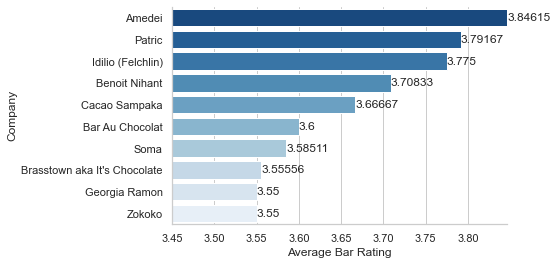

In [205]:
# Plot a bar plot
bar_plot(ten_better_companies, 'avg_rating', 'company', 'Average Bar Rating', 'Company', palette)

plt.savefig('images/best_companies.pdf')

#### Computing the best company for each country of the database

In [168]:
# Create a dataframe in which to save the best company for each country
d = {'country': [],
     'best_company': [],
     'avg_rating': []}
loc_companies = pd.DataFrame(d)

# Foreach country save its companies
for c in countries:
    companies_country = chocodata.loc[chocodata['company_location'] == c]
    # Create a dataframe in which to save the companies and their average evaluations
    d = {'company': [],
         'avg_rating': []}
    avg_companies = pd.DataFrame(d)
    # Foreach company in country c, compute the average rating of its bars
    for comp in companies_country.company:
        # Compute the average rating for company comp of country c
        company = companies_country[companies_country.company == comp]
        mean_rating = company['rating'].mean()
        # Insert that company and its average rating inside the avg_companies dataframe
        d = pd.DataFrame(
            {'company': [comp],
             'avg_rating': [mean_rating]})
        tmp = [avg_companies, d]
        avg_companies = pd.concat(tmp)
    # Extract the best company for country c
    best_company = avg_companies.nlargest(1, ['avg_rating'])
    # Insert the company in the dataframe
    d = pd.DataFrame(
            {'country': [c],
             'best_company': [best_company['company'].values[0]],
             'avg_rating': [best_company['avg_rating'].values[0]]})
    tmp = [loc_companies, d]
    loc_companies = pd.concat(tmp, ignore_index=True)

loc_companies.set_index('country')
loc_companies.sort_values('country')

,country,best_company,avg_rating
25,Amsterdam,Chocolate Makers,3.500000
29,Argentina,Salgado,3.500000
13,Australia,Matale,3.812500
48,Austria,Zotter,3.308824
15,Belgium,Benoit Nihant,3.708333
32,Bolivia,El Ceibo,3.250000
11,Brazil,Mission,3.625000
9,Canada,Christopher Morel (Felchlin),3.750000
53,Chile,Obolo,3.750000
20,Colombia,Cacao Hunters,3.464286


### ChocoStats

Here I will compute the stats for the chocolate bars; in particular:
- the distribution of grades with respect to the cocoa percentage
- the distribution of grades with respect to the bean type
- the distribution of grades with respect to the bean origin

#### Distribution of grades with respect to the cocoa percentage

In [169]:
# Get a list of all the unique percentage values of cocoa
percentages = chocodata.cocoa_percent.unique()

In [170]:
# Create the DataFrame that collects the average grade with respect to the cocoa percentage
d = { 'cocoa_percentage': [],
      'avg_rating': [],
      'num_bars': []
    }
avg_percentage = pd.DataFrame(d)

# Foreach cocoa percentage, compute its average evaluation
for p in percentages:
    bars = chocodata[chocodata.cocoa_percent == p]
    num = bars['ref'].count()
    mean_rating = bars['rating'].mean()
    d = pd.DataFrame(
        {'cocoa_percentage': [p],
         'avg_rating': [mean_rating],
         'num_bars': [num]})
    tmp = [avg_percentage, d]
    avg_percentage = pd.concat(tmp, ignore_index=True)

# Remove all the entries with too few bars
avg_percentage = avg_percentage.drop(avg_percentage[avg_percentage.num_bars < min_bars].index)

# Reset index and sort values in the DataFrame
avg_percentage.reset_index()
avg_percentage.sort_values('cocoa_percentage')

,cocoa_percentage,avg_rating,num_bars
6,55.0,2.859375,16.0
32,58.0,3.125000,8.0
2,60.0,3.005814,43.0
28,61.0,3.031250,8.0
30,62.0,2.964286,14.0
0,63.0,3.604167,12.0
11,64.0,3.191176,34.0
8,65.0,3.169872,78.0
12,66.0,3.380435,23.0
31,67.0,3.351852,27.0


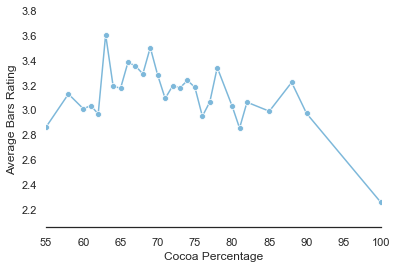

In [198]:
# Plot a line plot
line_plot(avg_percentage, 'cocoa_percentage', 'avg_rating', 'Cocoa Percentage', 'Average Bars Rating', palette[5])

plt.savefig('images/avg_cocoaPercentage.pdf')

#### Ten best bean types

In [172]:
# Get a list of all the unique cocoa bean types
beans = chocodata.bean_type.unique()

In [173]:
# Create the DataFrame that collects the average grade with respect to the cocoa percentage
d = { 'bean_type': [],
      'avg_rating': [],
      'num_bars': []
    }
avg_bean_type = pd.DataFrame(d)

# Foreach bean type, compute its average evaluation
for b in beans:
    bars = chocodata[chocodata.bean_type == b]
    mean_rating = bars['rating'].mean()
    num = bars['ref'].count()
    d = pd.DataFrame(
        {'bean_type': [b],
         'avg_rating': [mean_rating],
         'num_bars': [num]})
    tmp = [avg_bean_type, d]
    avg_bean_type = pd.concat(tmp, ignore_index=True)

# Remove all the grades linked to an unknown bean type
avg_bean_type = avg_bean_type[avg_bean_type.bean_type != 'unknown']

# Remove all the entries with too few bars
avg_bean_type = avg_bean_type.drop(avg_bean_type[avg_bean_type.num_bars < min_bars].index)

# Extract the 10 better bean types, in terms of average rating
ten_better_types = avg_bean_type.nlargest(10, columns=['avg_rating'])

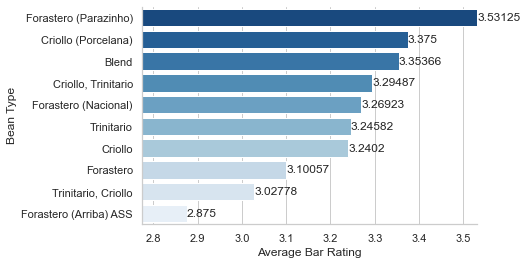

In [206]:
# Plot a bar plot
bar_plot(ten_better_types, 'avg_rating', 'bean_type', 'Average Bar Rating', 'Bean Type', palette)

plt.savefig('images/best_beanTypes.pdf')

#### Ten best bean exporters

TODO: FIX THE COUNTRIES NAMES

In [179]:
# Get a list of all the unique cocoa bean origins
b_origins = chocodata.broad_bean_origin.unique()

In [180]:
# Create the DataFrame that collects the average grade with respect to the cocoa percentage
d = { 'b_bean_origin': [],
      'avg_rating': [],
      'num_bars':[]
    }
avg_b_bean_origin = pd.DataFrame(d)

# Foreach bean type, compute its average evaluation
for o in b_origins:
    bars = chocodata[chocodata.broad_bean_origin == o]
    mean_rating = bars['rating'].mean()
    num = bars['ref'].count()
    d = pd.DataFrame(
        {'b_bean_origin': [o],
         'avg_rating': [mean_rating],
         'num_bars': [num]})
    tmp = [avg_b_bean_origin, d]
    avg_b_bean_origin = pd.concat(tmp, ignore_index=True)

# Remove all the grades linked to an unknown bean type
avg_b_bean_origin = avg_b_bean_origin[avg_b_bean_origin.b_bean_origin != 'unknown']

# Remove all the entries with too few bars
avg_b_bean_origin = avg_b_bean_origin.drop(avg_b_bean_origin[avg_b_bean_origin.num_bars < min_bars].index)

# Extract the 10 better bean types, in terms of average rating
ten_better_origins = avg_b_bean_origin.nlargest(10, columns=['avg_rating'])

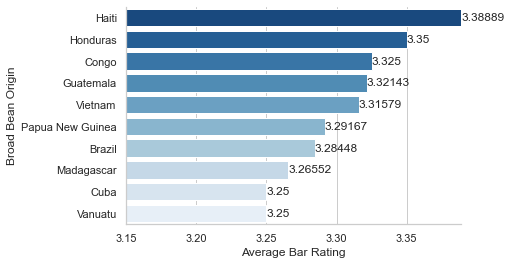

In [207]:
# Plot a bar plot
bar_plot(ten_better_origins, 'avg_rating', 'b_bean_origin', 'Average Bar Rating', 'Broad Bean Origin', palette)

plt.savefig('images/best_broadBeanOrigins.pdf')